In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from utils.helpers import *


In [2]:
# Load CSV
train_df = pd.read_csv('data/train_selected.csv')
eval_df  = pd.read_csv('data/test_selected.csv')
eval_ttf_df = convert_txt_to_df('ttf','data/PM_truth.txt')
eval_df = pd.concat([eval_df,eval_ttf_df],axis=1)

print('Train DF: ',train_df.shape)
print('Eval DF: ',eval_df.shape)

Train DF:  (20631, 8)
Eval DF:  (100, 7)


## Insights from Dataframe 

In [3]:
print('Train DF: ',train_df.columns)
train_df.describe()

Train DF:  Index(['id', 'cycle', 's1', 's2', 's3', 's4', 'ttf', 'label_bnc'], dtype='object')


,id,cycle,s1,s2,s3,s4,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,1408.933782,553.367711,47.541168,521.413470,107.807862,0.150259
std,29.227633,68.880990,9.000605,0.885092,0.267087,0.737553,68.880990,0.357334
min,1.000000,1.000000,1382.250000,549.850000,46.850000,518.690000,0.000000,0.000000
25%,26.000000,52.000000,1402.360000,552.810000,47.350000,520.960000,51.000000,0.000000
50%,52.000000,104.000000,1408.040000,553.440000,47.510000,521.480000,103.000000,0.000000
75%,77.000000,156.000000,1414.555000,554.010000,47.700000,521.950000,155.000000,0.000000
max,100.000000,362.000000,1441.490000,556.060000,48.530000,523.380000,361.000000,1.000000


Count: The total number of entries (rows) for each column. In the dataset, there are 20,631 entries for each column.

Mean: The average value for each column. For example, the average cycle number (cycle) is approximately 108.81, and the average sensor readings (s1, s2, s3, s4) are around 1408.93, 553.37, 47.54, and 521.41, respectively. The mean of ttf (Time-To-Failure) is 107.81, indicating the average remaining life cycles of engines in the dataset.

Std (Standard Deviation): This measures the spread of the data around the mean. A higher standard deviation means the data points are more spread out. For instance, the standard deviation for cycle is 68.88, suggesting a wide variation in the number of cycles among different engines.

Min: The minimum value in each column. The minimum values for sensor readings and other columns give the lowest recorded values in the dataset. For example, the minimum ttf is 0, indicating at least one engine has reached its failure point in your dataset.

25% (First Quartile): This is the median of the first half of the data. For example, 25% of the engines have a cycle number less than or equal to 52.

50% (Median): This is the middle value of the dataset. For example, the median value of cycle is 104, meaning half of the engines have completed more cycles and half fewer.

75% (Third Quartile): This is the median of the second half of the data. For instance, 75% of the engines have a cycle number less than or equal to 156.

Max: The maximum value in each column. It shows the highest recorded value. For example, the maximum cycle number is 362, indicating the longest-running engine in your dataset before failure or the end of observation.

In [4]:
print('Eval DF: ',eval_df.columns)
eval_df.describe()

Eval DF:  Index(['id', 'cycle', 's1', 's2', 's3', 's4', 'ttf'], dtype='object')


,id,cycle,s1,s2,s3,s4,ttf
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,130.960000,1410.548200,553.148900,47.595100,521.277000,75.52000
std,29.011492,53.593479,8.626344,0.880291,0.256989,0.697532,41.76497
min,1.000000,31.000000,1389.330000,550.880000,47.080000,519.440000,7.00000
25%,25.750000,88.750000,1403.912500,552.577500,47.397500,520.812500,32.75000
50%,50.500000,133.500000,1410.300000,553.270000,47.585000,521.450000,86.00000
75%,75.250000,164.250000,1416.922500,553.735000,47.757500,521.772500,112.25000
max,100.000000,303.000000,1428.420000,555.070000,48.130000,522.650000,145.00000


Count: This dataset has 100 entries for each column, indicating it's smaller than the training dataset ("Train DF").

Mean: The average values in each column. Notably, the average cycle number is 130.96, which is higher than in the training dataset, suggesting that this evaluation set might contain engines that have been operational for longer periods on average. The mean ttf (Time-To-Failure) is 75.52, suggesting a shorter average remaining life for engines in this dataset compared to the training set.

Std (Standard Deviation): Indicates the variability in the dataset. For example, the cycle standard deviation is 53.59, showing a somewhat wide variation in engine operational cycles.

Min: The minimum values for each column. The minimum ttf here is 7, suggesting the closest engine to failure in this set is closer to its end of life compared to the training set. (has only 7 operational cycles left before it is expected to fail)

25%, 50% (Median), and 75%: These percentiles give you an idea of the distribution of the data. For instance, the median cycle number is higher at 133.5 compared to the training set, reinforcing that this dataset contains engines with generally higher operational cycles.

Max: The maximum value in each column. The maximum cycle is 303, which is lower than the training set's maximum, indicating a narrower range of operational cycles in this evaluation dataset.

In [5]:
def add_label_bnc_column(dataframe:pd.DataFrame,rul=30):
    dataframe['label_bnc'] = (dataframe['ttf'] <= rul).astype(int)
    return dataframe

In [6]:
eval_df = add_label_bnc_column(eval_df)
eval_df.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0


## Checking for Nan Values

In [7]:
train_df.isna().sum()

id           0
cycle        0
s1           0
s2           0
s3           0
s4           0
ttf          0
label_bnc    0
dtype: int64

In [8]:
eval_df.isna().sum()

id           0
cycle        0
s1           0
s2           0
s3           0
s4           0
ttf          0
label_bnc    0
dtype: int64

There are no nan values in both train and test df 

## Check Skew

Skewness values provide insights into the shape of the distribution of your data. Understanding these can help in making decisions about data preprocessing and choosing appropriate models for predictive maintenance. For example, highly skewed data might need transformation to improve model performance.

In [9]:
train_df.skew()

id          -0.067815
cycle        0.499904
s1           0.443194
s2          -0.394329
s3           0.469329
s4          -0.442407
ttf          0.499904
label_bnc    1.957690
dtype: float64

id (-0.067815): The skewness is close to 0, suggesting that the distribution of engine IDs is fairly symmetrical around its mean.

cycle (0.499904): A positive skewness indicates that the distribution of cycles is slightly skewed to the right. This means there are more engines with lower operational cycles than higher ones.

Sensor Readings (s1, s2, s3, s4):

s1 (0.443194) and s3 (0.469329): These positive skewness values suggest a slight right skew in their distributions. There are more engines with lower sensor readings.
s2 (-0.394329) and s4 (-0.442407): These negative skewness values indicate a slight left skew. More engines have higher readings for these sensors.
ttf (0.499904): The skewness is positive and identical to cycle, which is expected as TTF (Time-To-Failure) is likely directly related to the cycle count. This skewness implies that more engines are closer to the beginning of their operational life than the end.

label_bnc (1.957690): This is a significantly high positive skewness, indicating a highly asymmetric distribution skewed to the right. It suggests that the majority of your engines (based on this binary label) are not close to failure (assuming 0 indicates normal and 1 indicates close to failure).

In [10]:
eval_df.skew()

id           0.000000
cycle        0.215392
s1           0.093980
s2          -0.342543
s3           0.246686
s4          -0.531490
ttf         -0.232969
label_bnc    1.172360
dtype: float64

id (0.000000): A skewness of 0 indicates that the distribution of engine IDs is perfectly symmetrical. This means that the distribution of engine IDs in your evaluation set is evenly balanced around its mean.

cycle (0.215392): A slightly positive skewness value suggests a mild rightward skew in the distribution of engine operational cycles. This means there are slightly more engines with fewer cycles than those with a higher number of cycles.

Sensor Readings (s1, s2, s3, s4):

s1 (0.093980) and s3 (0.246686): These positive skewness values, although relatively small, indicate a slight right skew in their distributions. There are a bit more engines with lower readings for these sensors.
s2 (-0.342543) and s4 (-0.531490): Negative skewness values suggest a left skew in the distribution. More engines have higher readings for these sensors.
ttf (-0.232969): The negative skewness for Time-To-Failure (ttf) suggests a leftward skew. This implies that more engines in this dataset are closer to the end of their operational life, with fewer cycles remaining before failure.

## Check Kurtosis 

Kurtosis values provide insights into the presence and extremity of outliers in your data. Understanding kurtosis is important in predictive modeling, as it can affect the performance and selection of models. For example, data with high kurtosis (heavy tails) might require robust modeling techniques that can handle outliers effectively. Conversely, data with low kurtosis (lighter tails) might not need such considerations.

In [11]:
train_df.kurtosis()

id          -1.219824
cycle       -0.218539
s1          -0.163681
s2          -0.157949
s3          -0.172192
s4          -0.144917
ttf         -0.218539
label_bnc    1.832726
dtype: float64

id (-1.219824): A negative kurtosis value indicates that the distribution of engine IDs has lighter tails than a normal distribution. This means there are fewer extreme values than what would be expected in a normal distribution.

cycle, ttf (-0.218539): Both cycle and Time-To-Failure (ttf) have a similar kurtosis value, which is slightly negative. This suggests that these distributions have slightly fewer and less extreme outliers compared to a normal distribution.

Sensor Readings (s1, s2, s3, s4):

All sensor readings (s1, s2, s3, s4) have negative kurtosis values (ranging from -0.144917 to -0.172192). This indicates that the distributions of these sensor readings are relatively flat with fewer extreme values than a normal distribution.
label_bnc (1.832726): This positive kurtosis value indicates that the distribution of the binary label for proximity to failure is more peaked than a normal distribution and has heavier tails. This suggests a higher likelihood of extreme values, which in this context could be interpreted as having more instances that are significantly different from the majority (more distinct cases of engines being close to failure or not).

In [12]:
eval_df.kurtosis()

id          -1.200000
cycle        0.000506
s1          -0.536076
s2          -0.056550
s3          -0.560676
s4          -0.180873
ttf         -1.288277
label_bnc   -0.638754
dtype: float64

id (-1.200000): This negative kurtosis value suggests that the distribution of engine IDs has lighter tails than a normal distribution (which has a kurtosis of 0). This means there are fewer extreme values in the engine ID distribution.

cycle (0.000506): A kurtosis value very close to 0 indicates that the distribution of engine operational cycles is similar to a normal distribution in terms of the extremity of outliers.

Sensor Readings (s1, s2, s3, s4):

s1 (-0.536076), s3 (-0.560676), and s4 (-0.180873): These negative kurtosis values indicate that the distributions of these sensors' readings are platykurtic, having fewer and less extreme outliers compared to a normal distribution.
s2 (-0.056550): The kurtosis is close to 0, suggesting a distribution similar to a normal distribution in terms of the tails and outliers.
ttf (-1.288277): The negative kurtosis for Time-To-Failure (ttf) indicates that the distribution is platykurtic. This suggests fewer and less extreme values in the tails than what a normal distribution would exhibit. In practical terms, this might mean that instances of engines being very close to or very far from failure are less common than the mid-range scenarios.

## Plots to Gain Insights on Data 

In [13]:
def create_distribution_plot(data:pd.DataFrame):
    fig,axes = plt.subplots(3,2,figsize=(15,12))
    # Plotting distribution of sensor readings
    sns.histplot(data['s1'], kde=True, ax=axes[0, 0]).set_title('Distribution of Sensor 1 Readings')
    sns.histplot(data['s2'], kde=True, ax=axes[0, 1]).set_title('Distribution of Sensor 2 Readings')
    sns.histplot(data['s3'], kde=True, ax=axes[1, 0]).set_title('Distribution of Sensor 3 Readings')
    sns.histplot(data['s4'], kde=True, ax=axes[1, 1]).set_title('Distribution of Sensor 4 Readings')
    sns.histplot(data['cycle'], kde=True, ax=axes[2, 0]).set_title('Distribution of Cycle Readings')

    plt.tight_layout()
    plt.show()
    
def create_corelation_matrix_plot(data:pd.DataFrame,columns:list):
    # Setting the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Correlation matrix for the train data
    # correlation_matrix = data[['s1', 's2', 's3', 's4', 'ttf']].corr()
    correlation_matrix = data[columns].corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Sensor Readings and label_bnc')
    plt.show()
    
def create_corelation_scatter_plot(data:pd.DataFrame):
    # Creating scatter plots for each sensor against TTF
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # Plotting each sensor's reading against TTF
    sns.scatterplot(x='label_bnc', y='s1', data=data, ax=axes[0, 0], alpha=0.6).set_title('Sensor 1 vs label_bnc')
    sns.scatterplot(x='label_bnc', y='s2', data=data, ax=axes[0, 1], alpha=0.6).set_title('Sensor 2 vs label_bnc')
    sns.scatterplot(x='label_bnc', y='s3', data=data, ax=axes[1, 0], alpha=0.6).set_title('Sensor 3 vs label_bnc')
    sns.scatterplot(x='label_bnc', y='s4', data=data, ax=axes[1, 1], alpha=0.6).set_title('Sensor 4 vs label_bnc')
    sns.scatterplot(x='label_bnc', y='cycle', data=data, ax=axes[2, 0], alpha=0.6).set_title('Cycle vs label_bnc')
    sns.scatterplot(x='label_bnc', y='ttf', data=data, ax=axes[2, 0], alpha=0.6).set_title('TTF vs label_bnc')

    plt.tight_layout()
    plt.show()
    
def create_box_plots_for_outliers(data:pd.DataFrame):
    # Creating box plots for each sensor to visualize the outliers
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # Plotting box plots
    sns.boxplot(x=data['s1'], ax=axes[0, 0]).set_title('Box Plot for Sensor 1')
    sns.boxplot(x=data['s2'], ax=axes[0, 1]).set_title('Box Plot for Sensor 2')
    sns.boxplot(x=data['s3'], ax=axes[1, 0]).set_title('Box Plot for Sensor 3')
    sns.boxplot(x=data['s4'], ax=axes[1, 1]).set_title('Box Plot for Sensor 4')
    sns.boxplot(x=data['cycle'], ax=axes[2, 0]).set_title('Box Plot for Cycle')

    plt.tight_layout()
    plt.show()

def create_scatter_plot_for_outliers(data:pd.DataFrame):
    # Identifying outliers using Z-score (threshold set at 3)
    z_scores = np.abs((data[['s1', 's2', 's3', 's4']] - data[['s1', 's2', 's3', 's4']].mean()) / data[['s1', 's2', 's3', 's4']].std())
    outliers = z_scores > 3 # Cut off limit based on std deviation
    outliers_summary = outliers.sum().to_frame(name='Number of Outliers')

    print(outliers_summary)
    outlier_mask = outliers.any(axis=1)
    outliers_data = data[outlier_mask]
    non_outliers_data = data[~outlier_mask]

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Scatter plots with outliers marked
    sns.scatterplot(x='cycle', y='s1', data=non_outliers_data, ax=axes[0, 0], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s1', data=outliers_data, ax=axes[0, 0], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s2', data=non_outliers_data, ax=axes[0, 1], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s2', data=outliers_data, ax=axes[0, 1], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s3', data=non_outliers_data, ax=axes[1, 0], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s3', data=outliers_data, ax=axes[1, 0], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s4', data=non_outliers_data, ax=axes[1, 1], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s4', data=outliers_data, ax=axes[1, 1], color='red', label='Outlier')

    plt.tight_layout()
    plt.show()


# Distribution Plots 

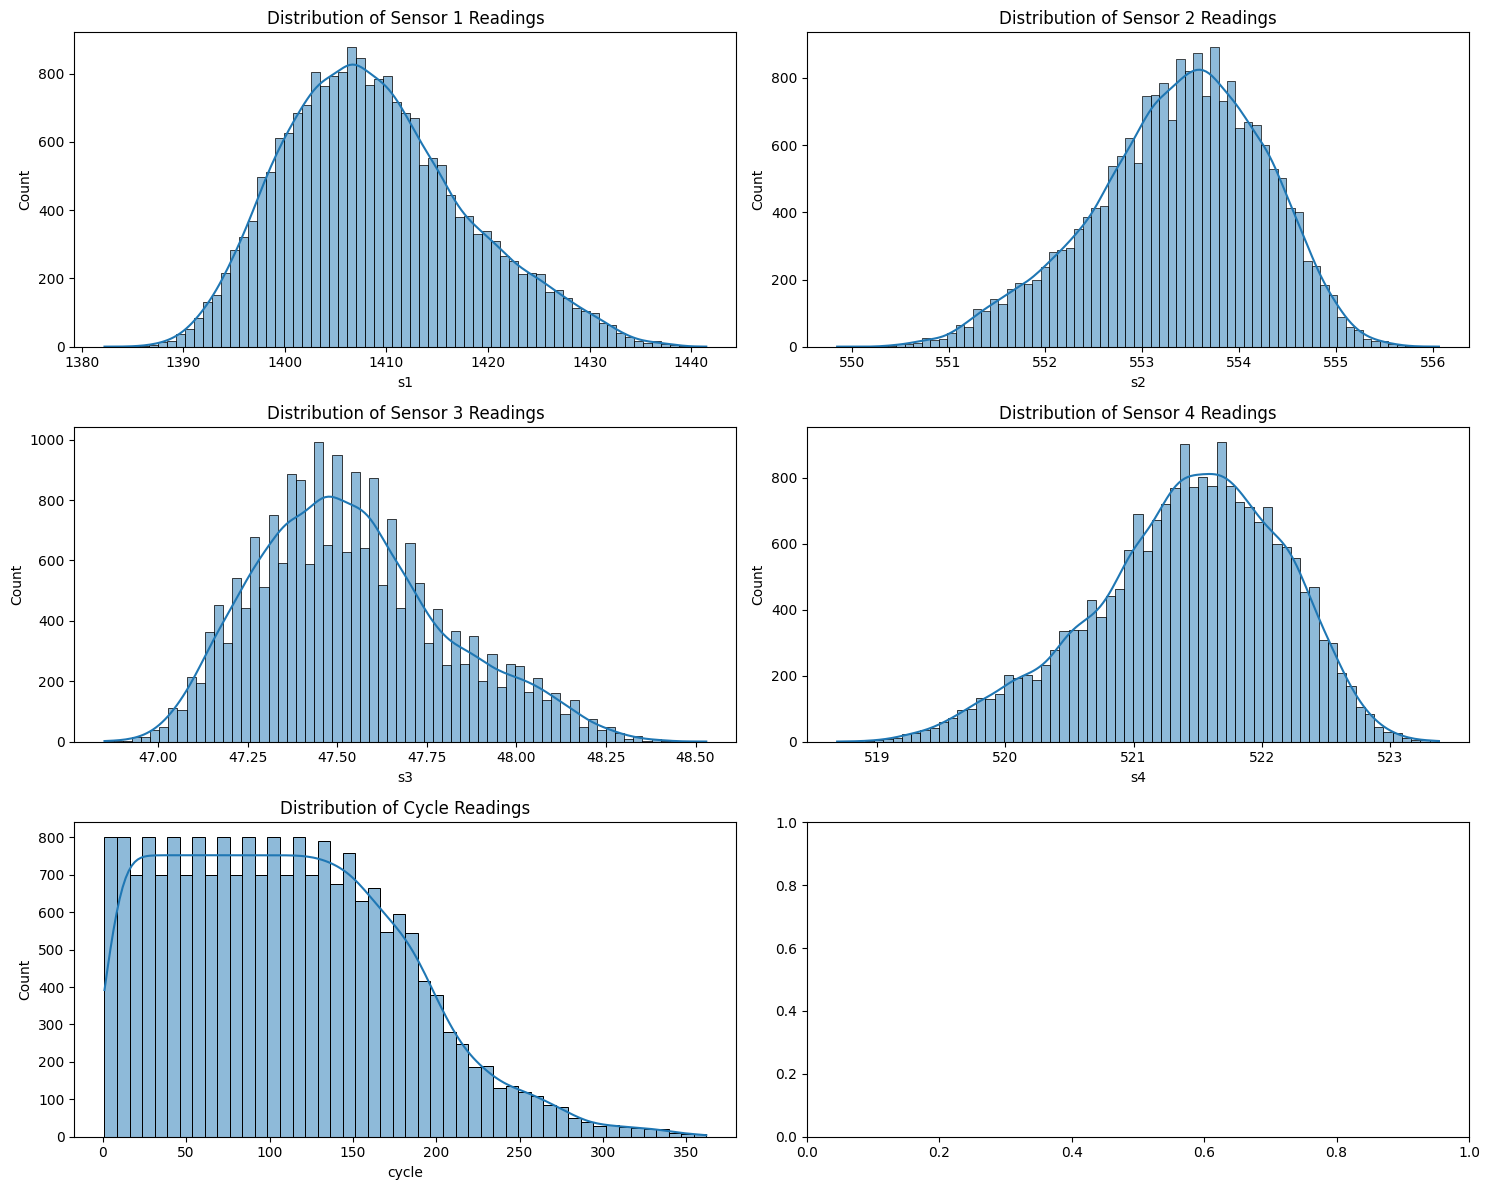

In [14]:
create_distribution_plot(train_df)

The distributions for the sensor readings (Sensor 1, Sensor 2, Sensor 3, and Sensor 4) appear to closely resemble a Gaussian distribution, also known as a normal distribution, which is characterized by a symmetric bell-shaped curve. However, there are slight deviations:

Sensor 1 and Sensor 2: These histograms show a distribution that is quite symmetric and bell-shaped, which is indicative of a normal distribution, although Sensor 2 has a minor skew to the left.
Sensor 3 and Sensor 4: These have a slight skew to the right, meaning that while they are mostly bell-shaped, they have a tail that extends more to the higher values.
The Cycle Readings histogram does not follow a Gaussian distribution—it shows a pronounced rightward skew, with a peak at the lower end of the cycle count and a long tail extending towards the higher cycle counts. This suggests that most engines are in the early stages of their life cycle, with relatively few having a large number of cycles.

In summary, while the sensor readings are approximately Gaussian with some skewness, the cycle readings do not follow a Gaussian distribution. The degree to which these distributions can be considered Gaussian would typically be assessed with statistical tests for normality, such as the Shapiro-Wilk test or the D'Agostino-Pearson omnibus test, which quantitatively measure how well the data conforms to a normal distribution.

In terms of statistics, the mean of the distributions would likely be close to the peak of each histogram for the sensors, while the mean for the cycle readings would be shifted to the left due to the skew. The standard deviation would provide insights into how spread out each distribution is; narrower distributions imply a smaller standard deviation. The skewness and kurtosis values that you have provided earlier are consistent with these visual interpretations: near-zero values for skewness and kurtosis indicate distributions close to normal, while positive or negative values indicate the direction and extent of the skew or the heaviness of the tails.

### Quantitavely Assess if the distribution is a Normal Distrubution

In [15]:
from scipy import stats
from tabulate import tabulate

def metrics_for_checking_normal_distribution(data:pd.DataFrame, columns:list=['s1', 's2', 's3', 's4', 'cycle']):
    results = {
        'Column': [],
        'Shapiro Statistic': [],
        'Shapiro p-value': [],
        'D\'Agostino Statistic': [],
        'D\'Agostino p-value': []
    }
    
    for col in columns:
        shapiro_stat, shapiro_p = stats.shapiro(data[col])
        dagostino_stat, dagostino_p = stats.normaltest(data[col])
        
        results['Column'].append(col)
        results['Shapiro Statistic'].append(shapiro_stat)
        results['Shapiro p-value'].append(shapiro_p)
        results['D\'Agostino Statistic'].append(dagostino_stat)
        results['D\'Agostino p-value'].append(dagostino_p)
    
    results_df = pd.DataFrame(results)
    
    # Pretty print the DataFrame using tabulate
    print(tabulate(results_df, headers='keys', tablefmt='pretty'))



In [16]:
metrics_for_checking_normal_distribution(train_df)

+---+--------+--------------------+------------------------+----------------------+-------------------------+
|   | Column | Shapiro Statistic  |    Shapiro p-value     | D'Agostino Statistic |   D'Agostino p-value    |
+---+--------+--------------------+------------------------+----------------------+-------------------------+
| 0 |   s1   | 0.9843162298202515 | 4.402879774908575e-42  |  645.5084110630376   | 6.755064910657037e-141  |
| 1 |   s2   | 0.9879209995269775 | 5.531733307644276e-38  |  523.1301156347602   | 2.5336039719248625e-114 |
| 2 |   s3   | 0.9815530776977539 |  9.80908925027372e-45  |  717.0642927745363   | 1.9564431784590942e-156 |
| 3 |   s4   | 0.9846979975700378 | 1.0959555289484394e-41 |  637.1438357106833   | 4.425618624479147e-139  |
| 4 | cycle  | 0.9687913656234741 |          0.0           |  821.6295132155666   | 3.8496222944558414e-179 |
+---+--------+--------------------+------------------------+----------------------+-------------------------+


/home/julian/miniconda3/envs/ml_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- **Column**: The name of the data column that the tests were performed on.
- **Shapiro Statistic**: The test statistic from the Shapiro-Wilk test; values close to 1 suggest that the data is normally distributed. All your variables have values close to 1, indicating they may be normally distributed, but the significance of this is determined by the p-value.
- **Shapiro p-value**: The p-value from the Shapiro-Wilk test. A p-value lower than a chosen alpha level (commonly 0.05) suggests that the data is not normally distributed. In your case, all the p-values are extremely small (practically 0 for 'cycle'), indicating that the null hypothesis of normality is rejected for all variables.
- **D'Agostino Statistic**: The test statistic from the D'Agostino-Pearson omnibus test; a larger value indicates a deviation from normality. All your variables have large values, suggesting non-normality.
- **D'Agostino p-value**: The p-value from the D'Agostino-Pearson omnibus test. Like the Shapiro-Wilk test, a p-value below the alpha level indicates non-normality. Again, all your variables have extremely small p-values, leading to rejection of the null hypothesis of normality.

Both tests suggest that none of the variables come from a normally distributed population, which means that the data distribution deviates significantly from the normal distribution. In summary, based on these tests, your data does not appear to follow a normal distribution, which may have implications for certain statistical analyses and model assumptions that presume normality.


An approach to make data more normally distributed would be transform the data. We will add the method here so it can be used later. 

Apply transformations to your data to make it more normally distributed. Common transformations include 
-log, 
-square root, or 
-Box-Cox transformations.

After transformation, perform the normality tests again to see if the data now fits the assumption of normality.

In [17]:
from scipy.stats import boxcox
from numpy import log, sqrt

def transform_to_normal_distribution(data:pd.DataFrame):
    data = data.copy()
    # Apply log transformation (all values must be positive)
    data['s1_log'] = data['s1'].apply(lambda x: log(x) if x > 0 else None)
    data['s2_log'] = data['s2'].apply(lambda x: log(x) if x > 0 else None)
    data['s3_log'] = data['s3'].apply(lambda x: log(x) if x > 0 else None)
    data['s4_log'] = data['s4'].apply(lambda x: log(x) if x > 0 else None)
    data['cycle_log'] = data['cycle'].apply(lambda x: log(x) if x > 0 else None)

    # Apply square root transformation (all values must be positive)
    data['s1_sqrt'] = data['s1'].apply(sqrt)
    data['s2_sqrt'] = data['s2'].apply(sqrt)
    data['s3_sqrt'] = data['s3'].apply(sqrt)
    data['s4_sqrt'] = data['s4'].apply(sqrt)
    data['cycle_sqrt'] = data['cycle'].apply(sqrt)

    # # Apply Box-Cox transformation (all values must be positive)
    # # Note: Box-Cox returns a tuple (transformed array, lambda parameter), so we only take the first element
    # data['s1_boxcox'], _ = boxcox(data['s1']) if all(data['s1'] > 0) else (None, None)
    # data['s2_boxcox'], _ = boxcox(data['s2']) if all(data['s2'] > 0) else (None, None)
    # data['s3_boxcox'], _ = boxcox(data['s3']) if all(data['s3'] > 0) else (None, None)
    # data['s4_boxcox'], _ = boxcox(data['s4']) if all(data['s4'] > 0) else (None, None)
    # data['cycle_boxcox'], _ = boxcox(data['cycle']) if all(data['cycle'] > 0) else (None, None)

    # # Now 'data' DataFrame contains the original and transformed columns
    # print(data.head())
    return data

In [18]:
transformed_train_df = transform_to_normal_distribution(train_df)
metrics_for_checking_normal_distribution(transformed_train_df,columns=['s1_log','s2_log','s3_log','s4_log','cycle_log'])
metrics_for_checking_normal_distribution(transformed_train_df,columns=['s1_sqrt','s2_sqrt','s3_sqrt','s4_sqrt','cycle_sqrt'])

+---+-----------+--------------------+------------------------+----------------------+------------------------+
|   |  Column   | Shapiro Statistic  |    Shapiro p-value     | D'Agostino Statistic |   D'Agostino p-value   |
+---+-----------+--------------------+------------------------+----------------------+------------------------+
| 0 |  s1_log   | 0.9851706027984619 | 3.4778826586077635e-41 |  612.8137164329542   | 8.495564847939879e-134 |
| 1 |  s2_log   | 0.9877650737762451 | 3.520488577896174e-38  |  531.1868489853442   | 4.510672676623641e-116 |
| 2 |  s3_log   | 0.9823929071426392 |  5.74532370373175e-44  |  688.0586318781586   |  3.890151138761e-150   |
| 3 |  s4_log   | 0.9845083355903625 | 6.951841681515417e-42  |  644.8592618261624   | 9.345240713214748e-141 |
| 4 | cycle_log | 0.8745604753494263 |          0.0           |  5796.3179546808215  |          0.0           |
+---+-----------+--------------------+------------------------+----------------------+------------------

/home/julian/miniconda3/envs/ml_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Shapiro-Wilk Test:
- **Shapiro Statistic**: Values closer to 1 suggest that the data distribution is more like a normal distribution.
- **Shapiro p-value**: A low p-value (typically less than 0.05) indicates that the data distribution is significantly different from a normal distribution.

### D'Agostino-Pearson Test:
- **D'Agostino Statistic**: A higher value suggests a deviation from normality.
- **D'Agostino p-value**: Similar to the Shapiro-Wilk test, a low p-value here also indicates non-normality.

### Analysis of Your Results:
- **For Log Transformed Data**: The Shapiro statistics are close to 1, but the extremely low p-values for all variables suggest that the data does not follow a normal distribution, even after log transformation.
- **For Square Root Transformed Data**: Similar to the log-transformed data, the p-values are extremely low despite the Shapiro statistics being close to 1, indicating a significant deviation from normality.

### Conclusions for Modeling:
- **Non-Normality of Data**: Both transformations did not result in data distributions that conform to normality. Hence, models that heavily rely on the assumption of normality might not be suitable.
- **Model Selection**: Given the non-normality, you might consider models that are robust to non-normal distributions. These include non-parametric models, machine learning algorithms (like decision trees, random forests, gradient boosting machines), and neural networks.
- **Further Transformations**: If a specific model requires normally distributed input, consider exploring other data transformations or using robust versions of statistical models.
- **Model Evaluation**: Regardless of the chosen model, thorough evaluation using appropriate metrics is essential. This includes cross-validation and metrics that align with your modeling objectives (e.g., RMSE for regression, accuracy, precision, recall, F1-score for classification).

Remember, the goal of transformations is not to force the data to meet model assumptions but to find the most appropriate model and transformation (if necessary) for the given data. In predictive modeling, the focus is often more on the predictive performance of the model rather than strict adherence to assumptions.


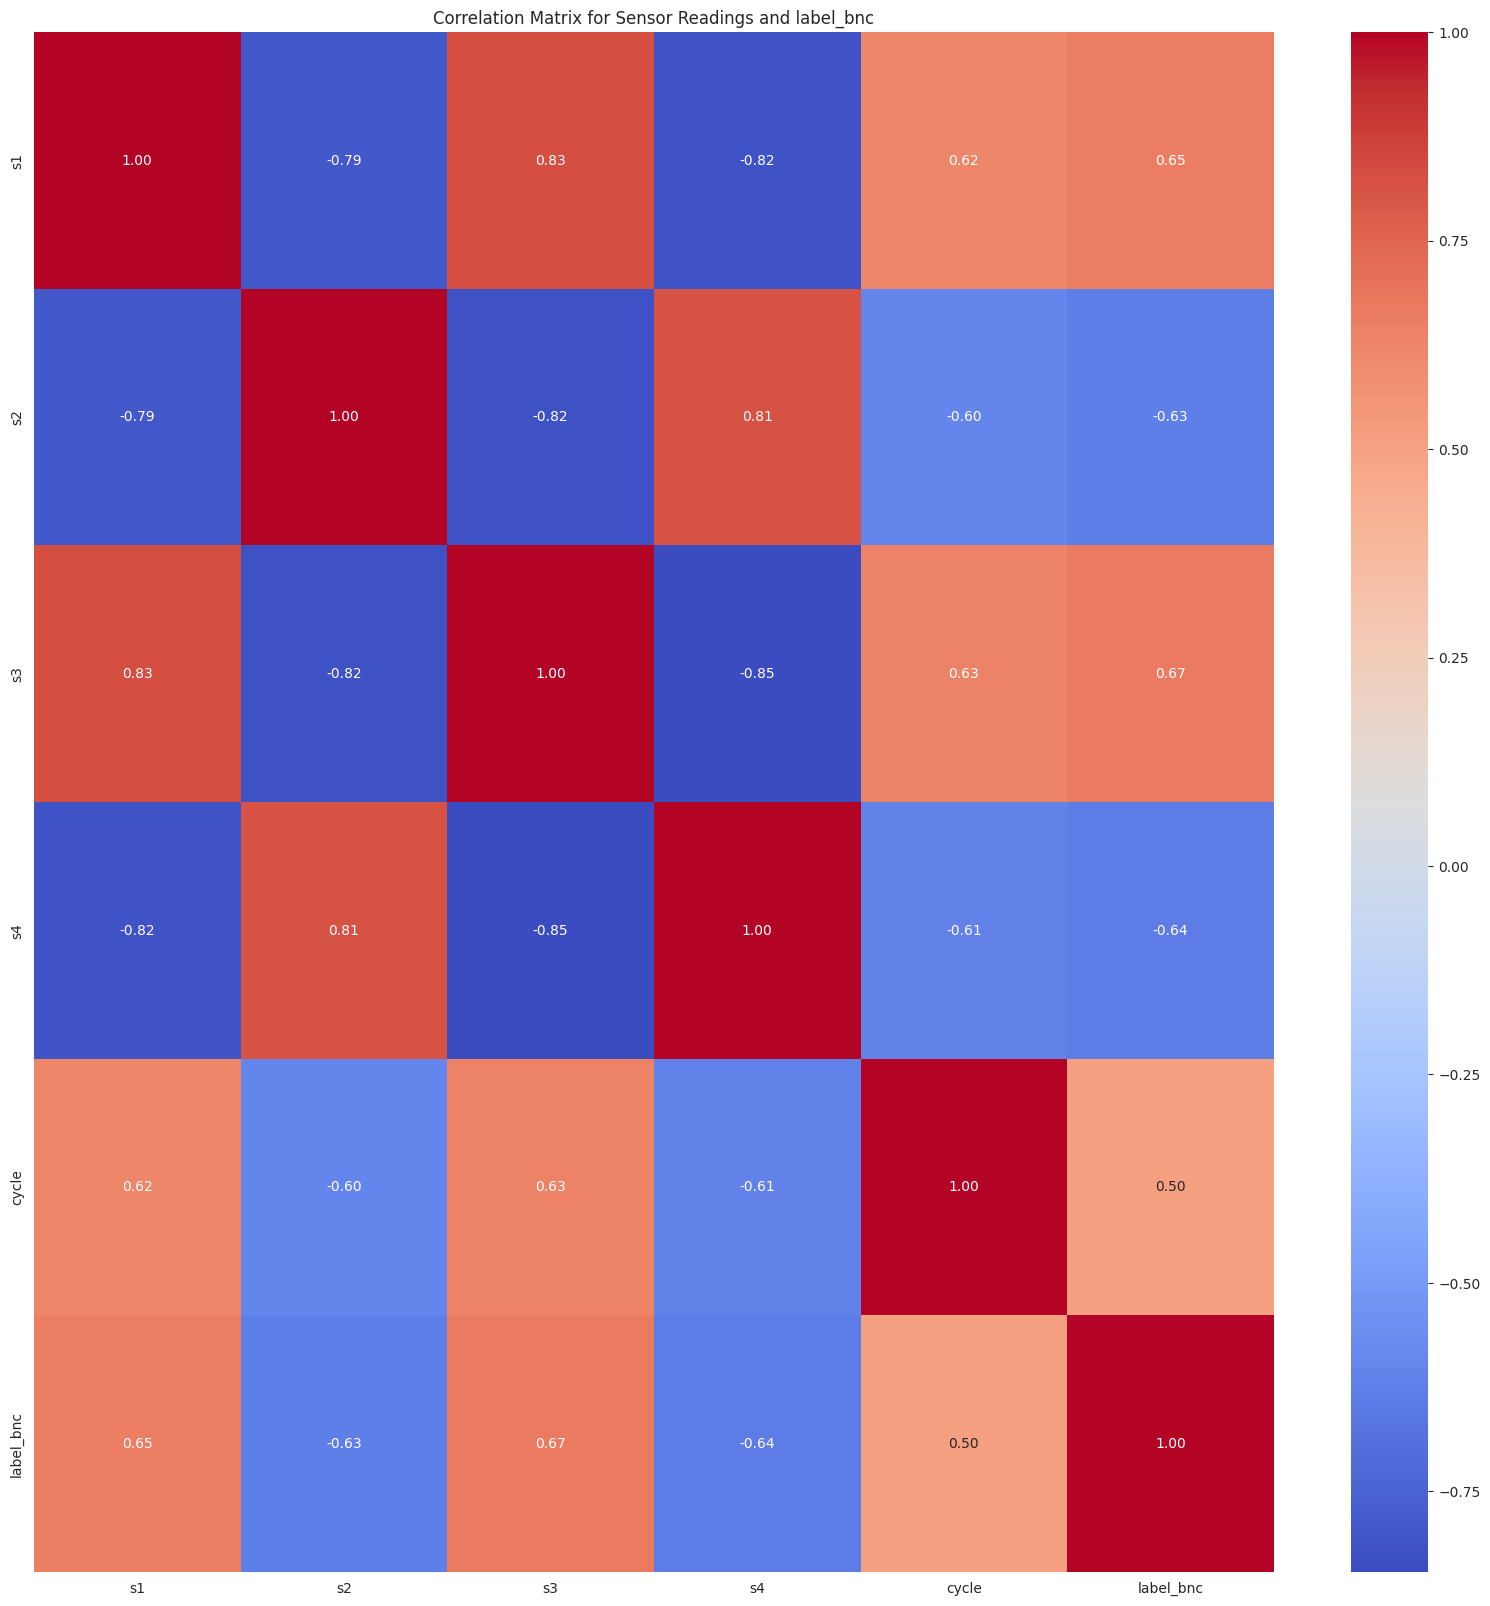

In [19]:
create_corelation_matrix_plot(train_df,columns=['s1', 's2', 's3', 's4', 'cycle','label_bnc'])

Each cell in the matrix shows the correlation coefficient between two variables. The variables are listed both along the x-axis (horizontal) and y-axis (vertical).
The correlation coefficient is a value between -1 and 1. A value of:
1 indicates a perfect positive correlation: as one variable increases, the other variable also increases.
-1 indicates a perfect negative correlation: as one variable increases, the other decreases.
0 indicates no correlation: the variables do not have a linear relationship.
The color scale on the right side indicates the strength and direction of the correlation. In this plot:
Red shades represent positive correlations.
Blue shades represent negative correlations.
The intensity of the color indicates the strength of the correlation (darker colors represent stronger correlations, whether positive or negative).
Looking at the specific variables:

s1, s2, s3, s4: These are likely sensor readings from the aircraft engine. The matrix shows that some sensors are highly positively or negatively correlated with each other. For instance, s1 and s3 have a strong positive correlation (0.83), indicating that when the s1 sensor reading increases, the s3 sensor reading tends to increase as well.
cycle: This likely represents the operational cycle count of the engine. It has moderate positive correlations with s1 and s3, and moderate negative correlations with s2 and s4.
ttf (Time-To-Failure): This is a critical variable indicating the remaining operational cycles before an engine failure is expected. It shows a negative correlation with s1 and s3 and a positive correlation with s2 and s4. This suggests that higher readings of s1 and s3 are associated with a shorter time to failure, and higher readings of s2 and s4 are associated with a longer time to failure.

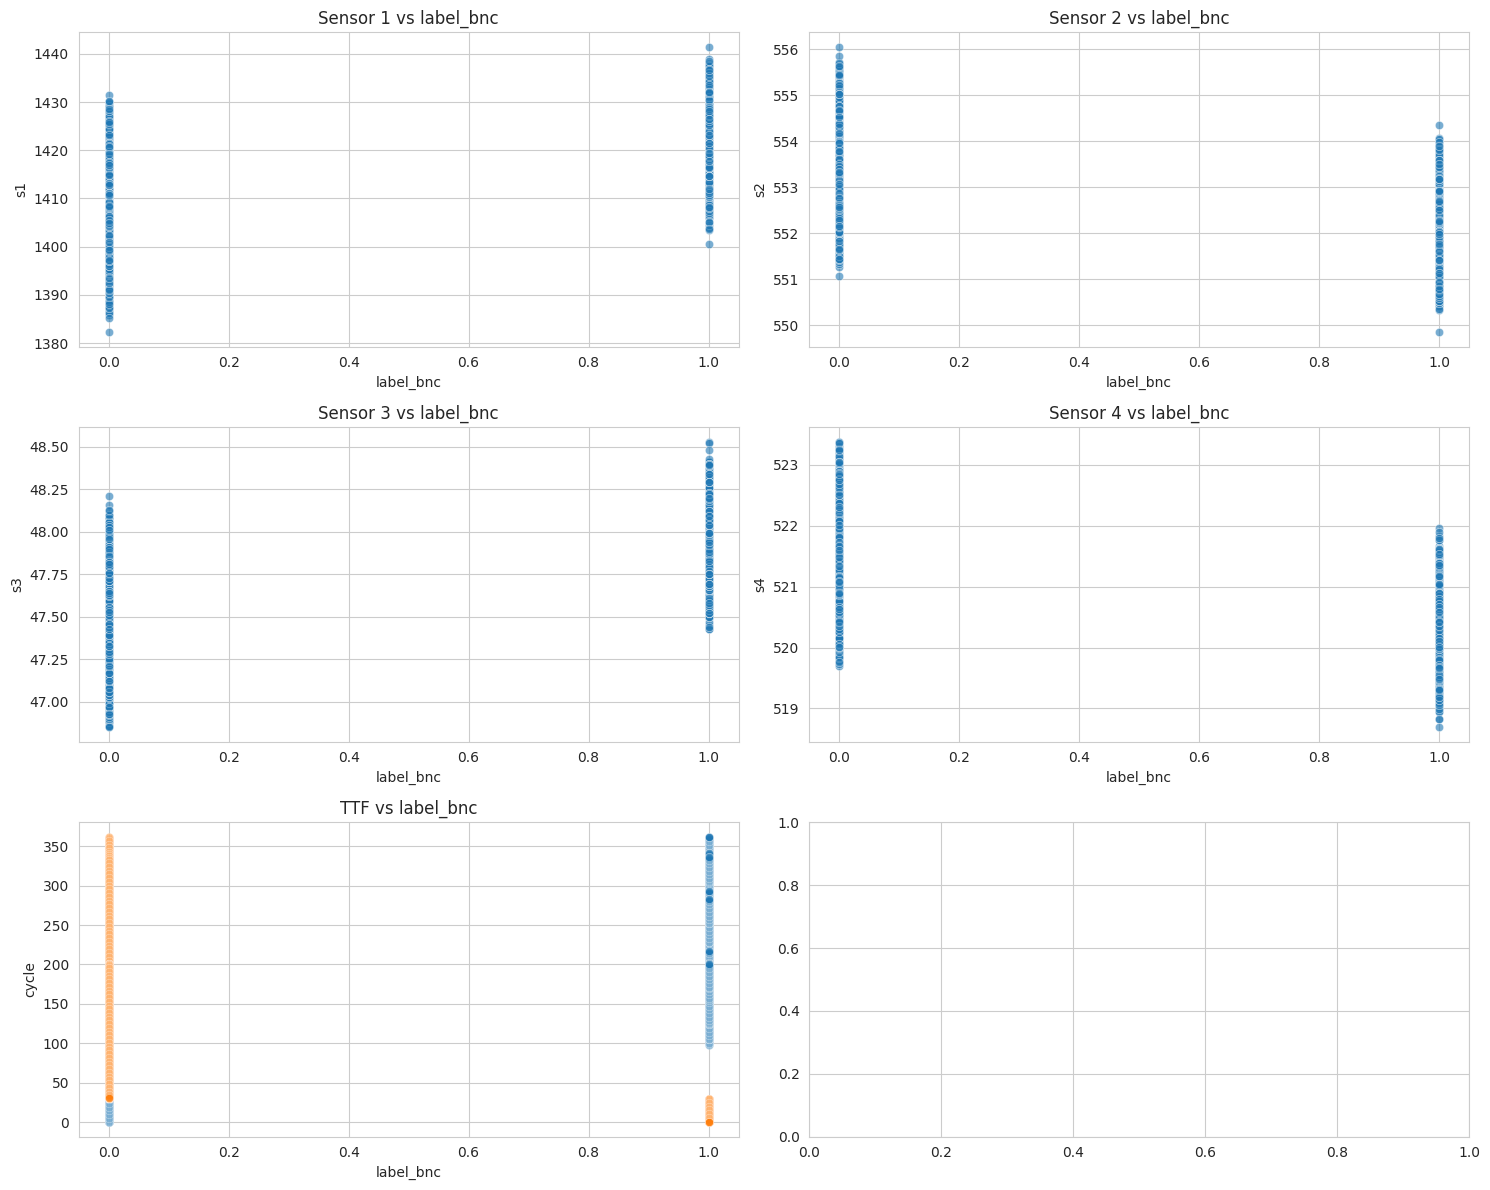

In [20]:
create_corelation_scatter_plot(train_df)

In [21]:
all_columns = list(train_df.columns)
col_to_drop = [col for col in all_columns if col not in ['s1','s2','s3','s4']]
col_to_drop

['id', 'cycle', 'ttf', 'label_bnc']

In [22]:
def apply_feature_selection(data:pd.DataFrame,f_columns:list):
    mod_data = data.copy()
    all_columns = list(mod_data.columns)
    col_to_drop = [col for col in all_columns if col not in f_columns]
    modified_data = mod_data.drop(col_to_drop,axis=1)
    return modified_data

In [23]:
# Usage
feature_columns = ['s1','s2','s3','s4']
x_feature = apply_feature_selection(train_df,feature_columns)
x_feature.head()

,s1,s2,s3,s4
0,1400.60,554.36,47.47,521.66
1,1403.14,553.75,47.49,522.28
2,1404.20,554.26,47.27,522.42
3,1401.87,554.45,47.13,522.86
4,1406.22,554.00,47.28,522.19


## Plots for outliers

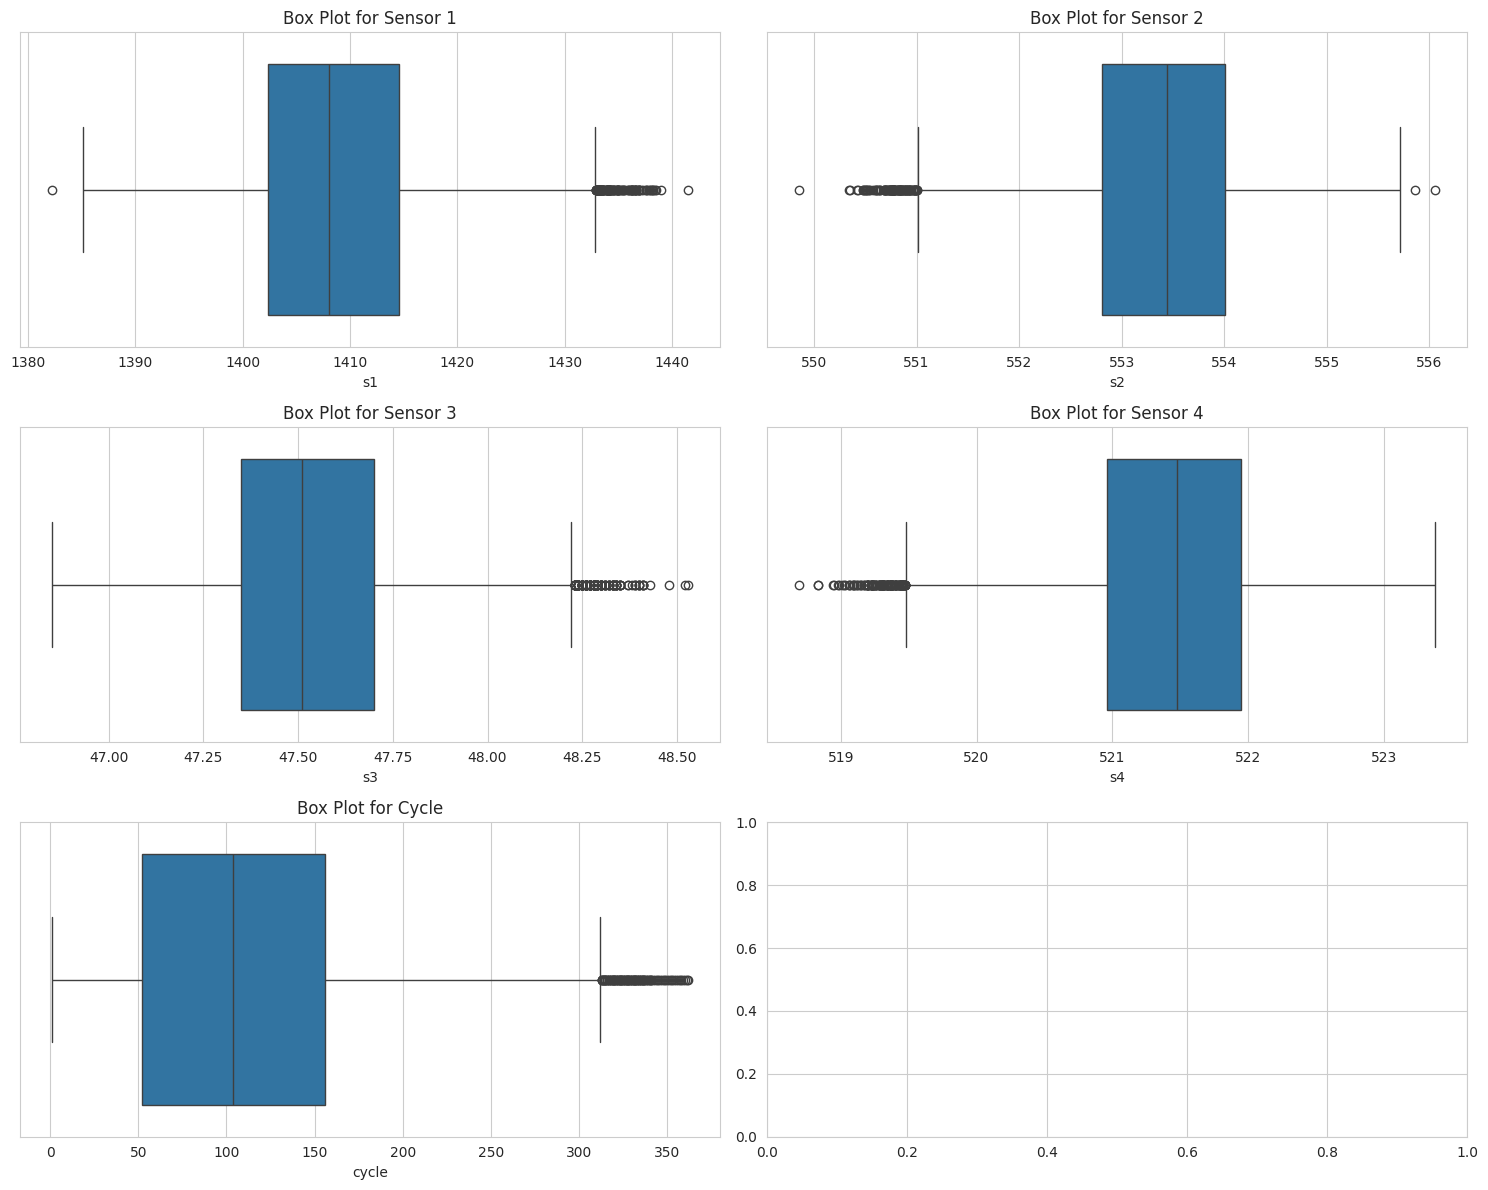

In [24]:
create_box_plots_for_outliers(train_df)

    Number of Outliers
s1                  36
s2                  34
s3                  23
s4                  34


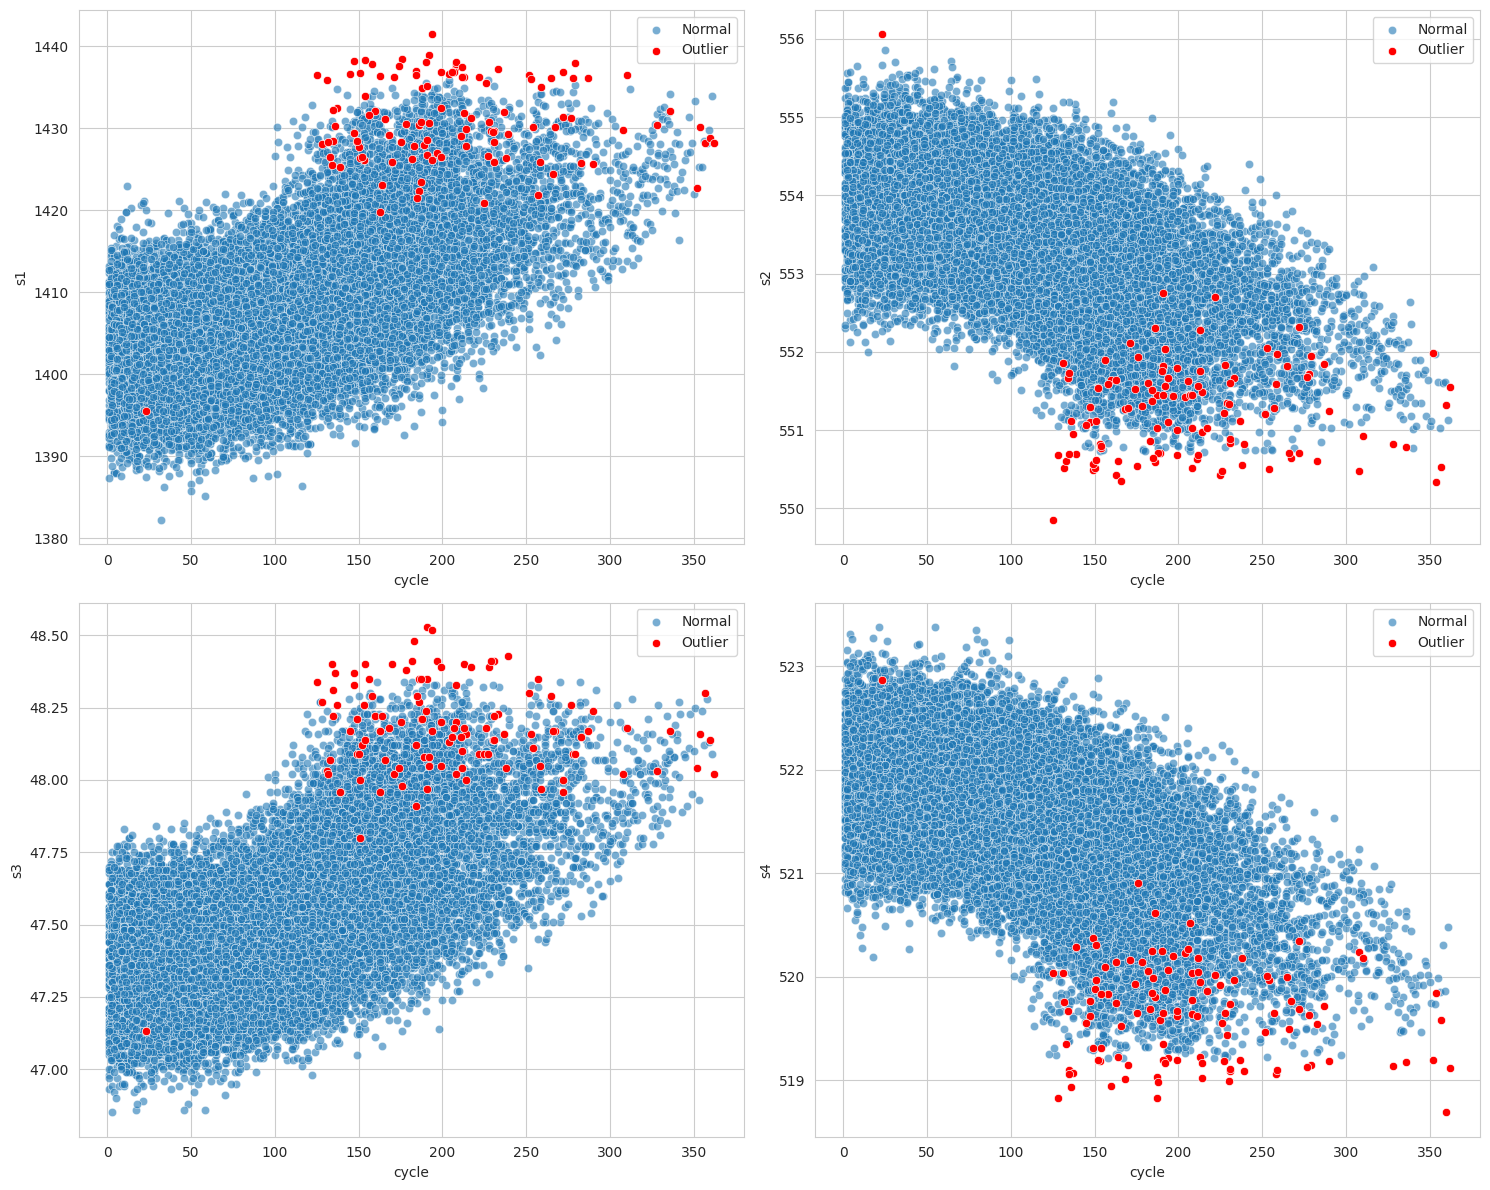

In [25]:
create_scatter_plot_for_outliers(train_df)

# Plot for Autocorelation to understand Time Series Dependenance to choose window size for rolling window approach 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_sensor_acf_pacf(df, lags):
    sensor_columns = [col for col in df.columns if col.startswith('s')]
    fig, axes = plt.subplots(nrows=len(sensor_columns), ncols=2, figsize=(12, len(sensor_columns) * 4))

    for i, col in enumerate(sensor_columns):
        # Plot ACF
        plt.sca(axes[i, 0])
        plot_acf(df[col], lags=lags, ax=axes[i, 0])
        axes[i, 0].set_title(f'Autocorrelation for {col}')
        
        # Plot PACF
        plt.sca(axes[i, 1])
        plot_pacf(df[col], lags=lags, ax=axes[i, 1])
        axes[i, 1].set_title(f'Partial Autocorrelation for {col}')

    plt.tight_layout()
    plt.show()

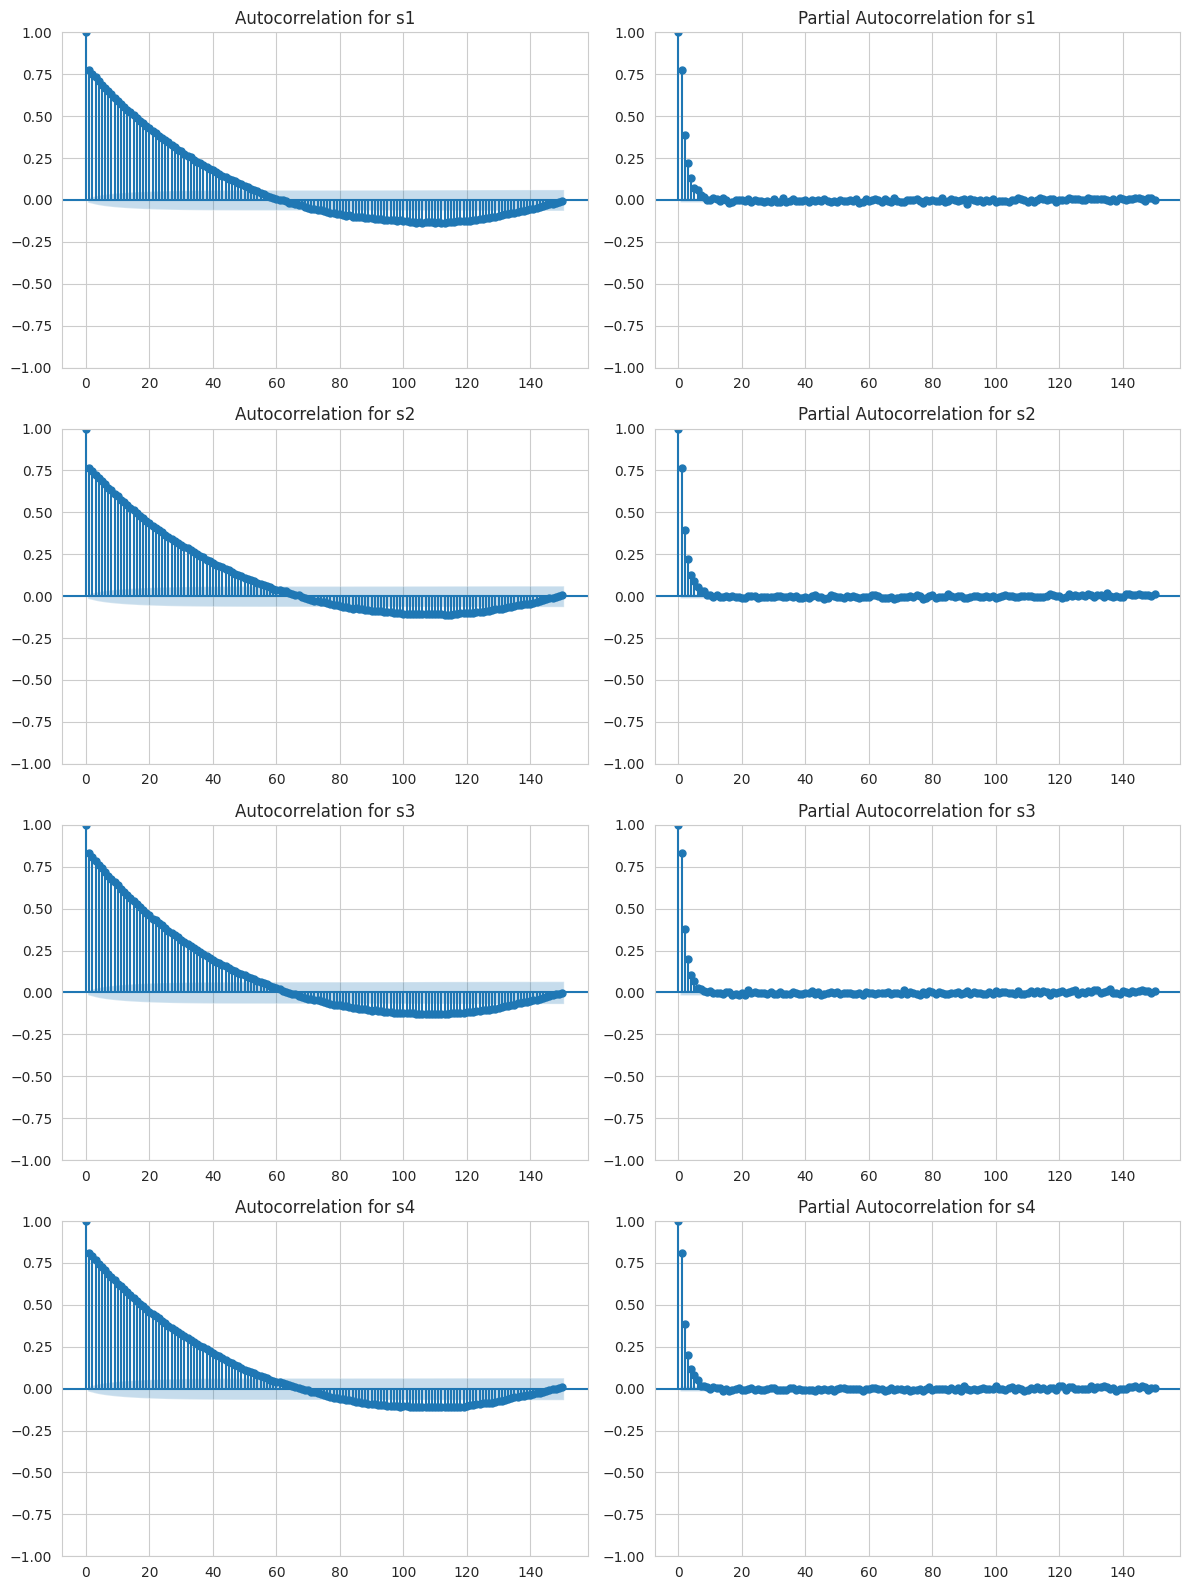

In [27]:
plot_sensor_acf_pacf(train_df,150)

For s1 and s2, the autocorrelation drops off quickly after the first few lags. This suggests a smaller window size might be appropriate, perhaps in the range of 5-10, to capture the immediate correlation without introducing too much lagged effect.

For s3 and s4, the autocorrelation also declines relatively quickly, but not as sharply as for s1 and s2. A slightly larger window might be beneficial to capture more of the relevant past information. A window size in the range of 10-20 could be a good starting point.

## Classification  Modelling

In [28]:
import statsmodels.api as sm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBRegressor
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from itertools import product
from pathlib import Path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
import optuna
import random

from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


def generate_experiment_name():
    adjectives = ['Optimal', 'Predictive', 'Advanced', 'Innovative', 'Efficient', 'Reliable', 'Dynamic', 'Precision', 'Intelligent', 'Robust']
    nouns = ['Flight', 'Engine', 'Aero', 'Turbo', 'Propulsion', 'Avionics', 'Thrust', 'Rotor', 'Wing', 'Fuselage']
    number = random.randint(1, 300)

    return f"{random.choice(adjectives)}_{random.choice(nouns)}_{number}"

def normalize_features(x_data:pd.DataFrame,cols_to_exclude:list,slr_type:str='standard'):
    x_mod = x_data.copy()
    # x_mod['cycle_norm']=x_mod['cycle']
    if len(cols_to_exclude) >0:
        cols_normalize = x_mod.columns.difference(cols_to_exclude)
    else:
        cols_normalize = x_mod.columns
    scalers = {
        'standard': StandardScaler(),
        'min_max': MinMaxScaler(),
        'max_abs': MaxAbsScaler(),
        'robust': RobustScaler(quantile_range=(25, 75)),
        'sample_wise_L2': Normalizer()
    }
    
    norm_x_data = pd.DataFrame(scalers[slr_type].fit_transform(x_mod[cols_normalize]),columns=cols_normalize,index=x_mod.index)
    join_df = x_mod[cols_to_exclude].join(norm_x_data)
    new_x_data = join_df.reindex(columns = x_mod.columns)
    return new_x_data 

# Define the objective function for Optuna
def optuna_objective(trial, model_type, x_train, y_train, x_test, y_test):
    if model_type == 'svm':
        params = {
            'C': trial.suggest_loguniform('C', 1e-1, 10),
            'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        }
        model = SVC(**params)
    elif model_type == 'random_forest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
            'max_depth': trial.suggest_int('max_depth', 2, 32),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
        }
        model = RandomForestClassifier(**params)
    elif model_type == 'xgboost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
            'max_depth': trial.suggest_int('max_depth', 2, 32),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-10, 1),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1)
        }
        model = XGBClassifier(**params)
    else:
        raise ValueError("Invalid model type specified")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return f1

def check_and_create(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    return save_dir

def unified_classification_modeling(x_train, y_train, x_test, y_test, seed, model_type,features_used,normalization_used,rolling_window_used,save_dir,use_optuna=False, n_trials=100,model_params=None):
    experiment_name = generate_experiment_name()
    exp_dir = check_and_create(os.path.join(save_dir,experiment_name))
    results = {
        "run":experiment_name,
        "model": [],
        "accuracy":[],
        "precision": [],
        "recall": [],
        "f1_score": [],
        "precision_class_0":[],
        "precision_class_1": [],
        "recall_class_0": [],
        "recall_class_1": [],
        "f1_score_class_0":[],
        "f1_score_class_1": [],
        "specificity": [],
        "sensitivity": [],
        "features_used":features_used,
        "normalize_used":normalization_used,
        "rolling_window":rolling_window_used
    }

    if use_optuna:
        print(f'---- Starting Optuna Study for {model_type} using {features_used} with {normalization_used} normalization ----')
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: optuna_objective(trial, model_type, x_train, y_train, x_test, y_test), n_trials=n_trials)
        model_params = study.best_params
        if model_type == 'xgboost':
            model_xgb2 = XGBClassifier(**model_params)
            models_to_use = [model_xgb2]

        elif model_type == 'svm':
            models_to_use = [SVC(**model_params,probability=True)]

        elif model_type == 'random_forest':
            models_to_use = [RandomForestClassifier(**model_params)]

        else:
            raise ValueError("Invalid model type specified")
    else:

        if model_type == 'xgboost':
            model_xgb2 = XGBClassifier(**model_params)
            models_to_use = [model_xgb2]

        elif model_type == 'svm':
            models_to_use = [SVC(**model_params)]

        elif model_type == 'random_forest':
            models_to_use = [RandomForestClassifier(**model_params)]

        else:
            raise ValueError("Invalid model type specified")

    # concat model params with results dict
    results.update(model_params)
    for model in models_to_use:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results = update_results(results, model.__class__.__name__, y_test, y_pred)
    plot_results(model,x_train,y_train,phase='train',model_name=model.__class__.__name__,save_dir=exp_dir)
    plot_results(model,x_test,y_test,phase='eval',model_name=model.__class__.__name__,save_dir=exp_dir)
    print_top10_results(results)

def update_results(results, model_name, y_test, y_pred):
    # Calculate overall metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Calculate per class metrics
    precision_class = precision_score(y_test, y_pred, average=None)
    recall_class = recall_score(y_test, y_pred, average=None)
    f1_class = f1_score(y_test, y_pred, average=None)
    
    # Calculate specificity and sensitivity (recall for class 0 and class 1)
    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = recall  # which is the same as recall for the positive class

    # Update results dictionary
    results["model"].append(model_name)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1_score"].append(f1)
    results["precision_class_0"].append(precision_class[0])
    results["precision_class_1"].append(precision_class[1])
    results["recall_class_0"].append(recall_class[0])
    results["recall_class_1"].append(recall_class[1])
    results["f1_score_class_0"].append(f1_class[0])
    results["f1_score_class_1"].append(f1_class[1])
    results["specificity"].append(specificity)
    results["sensitivity"].append(sensitivity)

    return results

def plot_results(model,x_data,y_data,model_name,save_dir,phase):
    plt.style.use('seaborn-v0_8-white')  # Ensure this style is available in your environment
    plt.rcParams['figure.figsize'] = 20, 10 
    

    fig, axs = plt.subplots(1, 3)
    axs = [axs]  # Make it a list of axes to keep indexing consistent

    # Calculate predictions
    y_pred = model.predict(x_data)
    y_pred_prob = model.predict_proba(x_data)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_data, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot Confusion Matrix in the first subplot
    cm = confusion_matrix(y_data, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[0][0])
    axs[0][0].set_title('Confusion Matrix')
    axs[0][0].set_xlabel('Predicted')
    axs[0][0].set_ylabel('True')
    
    # Plot ROC Curve in the second subplot
    axs[0][1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axs[0][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[0][1].set_xlim([0.0, 1.0])
    axs[0][1].set_ylim([0.0, 1.05])
    axs[0][1].set_xlabel('False Positive Rate')
    axs[0][1].set_ylabel('True Positive Rate')
    axs[0][1].set_title('Receiver Operating Characteristic')
    axs[0][1].legend(loc="lower right")

    # Save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{phase}_results.png'))
    plt.close()

def print_results(results):
    results_csv = 'experiment_tracker_classification.csv'
    if Path(results_csv).exists():
        results_df = pd.read_csv(results_csv)
        new_results = pd.DataFrame(results)
        combined_df = pd.concat([results_df,new_results])
        combined_df.to_csv(results_csv,index=False)
        print(tabulate(combined_df, headers='keys', tablefmt='pretty'))
    else:
        results_df = pd.DataFrame(results)
        results_df.to_csv(results_csv,index=False)
        print(tabulate(results_df, headers='keys', tablefmt='pretty'))

def print_top10_results(results):
    results_csv = 'experiment_tracker_classification.csv'
    if Path(results_csv).exists():
        results_df = pd.read_csv(results_csv)
    else:
        results_df = pd.DataFrame()

    new_results = pd.DataFrame(results)
    combined_df = pd.concat([results_df, new_results])

    # Sort by 'eval_mae' and select the top 10
    top_10_df = combined_df.sort_values(by='f1_score', ascending=False).head(10)

    combined_df.to_csv(results_csv, index=False)
    print(tabulate(top_10_df, headers='keys', tablefmt='pretty'))
    
# Prepare feature for rolling window approach 
def preprocess_sensor_data(dataframe:pd.DataFrame, window_size:int=5,use_method:str='rolling_window')->pd.DataFrame:
    # Load the dataset
    df=dataframe.copy()
    # Calculate rate of change for sensor readings
    if use_method == 'rate_of_change':
        for column in df.columns:
            if column.startswith('s'):
                df[f'{column}_rate_of_change'] = df[column].diff()
    elif use_method == 'rolling_window':
        # Calculate rolling statistics
        for column in df.columns:
            if column.startswith('s'):
                df[f'{column}_rolling_mean'] = df[column].rolling(window=window_size).mean()
                df[f'{column}_rolling_std'] = df[column].rolling(window=window_size).std()
                df[f'{column}_rolling_median'] = df[column].rolling(window=window_size).median()
    else:
        for column in df.columns:
            if column.startswith('s'):
                df[f'{column}_rate_of_change'] = df[column].diff()
        # Calculate rolling statistics
        for column in df.columns:
            if not column.endswith('_rate_of_change'):
                if column.startswith('s'):
                    df[f'{column}_rolling_mean'] = df[column].rolling(window=window_size).mean()
                    df[f'{column}_rolling_std'] = df[column].rolling(window=window_size).std()
                    df[f'{column}_rolling_median'] = df[column].rolling(window=window_size).median()
        

    # Drop initial rows with NaN values due to rolling computation
    df.dropna(inplace=True)

    return df


# Example usage of the function:
# unified_regression_modeling(x_train, y_train, x_test, y_test, model_type='xgboost', seed=42)


/home/julian/miniconda3/envs/ml_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Classification Modelling 

In [29]:
use_normalization = [True,False]
scalers_to_use = ["min_max","standard","robust"]
models_to_use = ["xgboost","svm","random_forest"]
save_dir = os.path.join(os.getcwd(),'experiment_classification')
save_dir =  check_and_create(save_dir)

seed = 42
feature_columns_to_use =[['s1','s2','s3','s4','cycle'],['s1','s3','cycle'],['s2','s4','cycle']]
window_sizes_to_use = [5,10,15,20]
use_additional_feature = [True,False]
additional_feature_method = ['rolling_window','rate_of_change','both']

for feature_columns in feature_columns_to_use:
    x_train_feature = apply_feature_selection(train_df,feature_columns)
    y_train_target = train_df['label_bnc']
    x_eval_feature = apply_feature_selection(eval_df,feature_columns)
    y_eval_target = eval_df['label_bnc']
    # for check_use_additional in use_additional_feature:
        # if check_use_additional:
        #     for window_size in window_sizes_to_use:
        #         x_train_feature,y_train_target = prepare_optimal_feature_data(train_df,feature_columns,window_size)
        #         x_eval_feature,y_eval_target = prepare_optimal_feature_data(eval_df,feature_columns,window_size)
        #         print(f'Train X Shape: {x_train_feature.shape} | Y Shape: {y_train_target.shape}')
        #         print(f'Eval X Shape: {x_eval_feature.shape} | Y Shape: {y_eval_target.shape}')
        #         for model in models_to_use:
        #             features_to_use = '_'.join(x_train_feature.columns)
        #             if model != 'svm':
        #                 # No scaling need be applied 
        #                 unified_regression_modeling(
        #                     x_train=x_train_feature,
        #                     y_train=y_train_target,
        #                     x_test=x_eval_feature,
        #                     y_test=y_eval_target,
        #                     use_optuna=True,
        #                     model_type=model,
        #                     seed=42,
        #                     save_dir=save_dir,
        #                     features_used=features_to_use,
        #                     normalization_used='none',
        #                     rolling_window_used=window_size
        #                 )
        #             else:
        #                 for check_norm in use_normalization:
        #                     if check_norm:
        #                         for scaler in scalers_to_use:
        #                             # Using Normalization 
        #                             x_train = normalize_features(x_train_feature,cols_to_exclude=[],slr_type=scaler)
        #                             x_eval = normalize_features(x_eval_feature,cols_to_exclude=[],slr_type=scaler)
        #                             # Using Optuna 
        #                             unified_regression_modeling(
        #                                 x_train=x_train,
        #                                 y_train=y_train_target,
        #                                 x_test=x_eval,
        #                                 y_test=y_eval_target,
        #                                 use_optuna=True,
        #                                 model_type=model,
        #                                 seed=42,
        #                                 save_dir=save_dir,
        #                                 features_used=features_to_use,
        #                                 normalization_used=scaler,
        #                                 rolling_window_used=window_size
        #                             )
        # else:
            # x_train_feature = apply_feature_selection(train_df,feature_columns)
            # y_train_target = train_df['ttf']
            # x_eval_feature = apply_feature_selection(eval_df,feature_columns)
            # y_eval_target = eval_df['ttf']
            # print(f'Train X Shape: {x_train_feature.shape} | Y Shape: {y_train_target.shape}')
            # print(f'Eval X Shape: {x_eval_feature.shape} | Y Shape: {y_eval_target.shape}')
    for model in models_to_use:
        features_to_use = '_'.join(x_train_feature.columns)
        if model != 'svm':
            # No scaling need be applied 
            unified_classification_modeling(
                x_train=x_train_feature,
                y_train=y_train_target,
                x_test=x_eval_feature,
                y_test=y_eval_target,
                use_optuna=True,
                model_type=model,
                seed=42,
                save_dir=save_dir,
                features_used=features_to_use,
                normalization_used='none',
                rolling_window_used=0
            )
        else:
            for check_norm in use_normalization:
                if check_norm:
                    for scaler in scalers_to_use:
                        # Using Normalization 
                        x_train = normalize_features(x_train_feature,cols_to_exclude=[],slr_type=scaler)
                        x_eval = normalize_features(x_eval_feature,cols_to_exclude=[],slr_type=scaler)
                        # Using Optuna 
                        unified_classification_modeling(
                            x_train=x_train,
                            y_train=y_train_target,
                            x_test=x_eval,
                            y_test=y_eval_target,
                            use_optuna=True,
                            model_type=model,
                            seed=42,
                            save_dir=save_dir,
                            features_used=features_to_use,
                            normalization_used=scaler,
                            rolling_window_used=0
                        )
            
        

[I 2023-11-27 01:03:10,549] A new study created in memory with name: no-name-de299a79-7d9a-4de4-9871-93a1c518fc3b
/tmp/ipykernel_327299/434341890.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-10, 1),
/tmp/ipykernel_327299/434341890.py:82: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1),
/tmp/ipykernel_327299/434341890.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytr

---- Starting Optuna Study for xgboost using cycle_s1_s2_s3_s4 with none normalization ----


[I 2023-11-27 01:03:13,726] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 674, 'max_depth': 19, 'learning_rate': 1.7753241020811455e-07, 'subsample': 0.5769159285869236, 'colsample_bytree': 0.9256334647490271}. Best is trial 0 with value: 0.0.
/tmp/ipykernel_327299/434341890.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-10, 1),
/tmp/ipykernel_327299/434341890.py:82: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1),
/tmp/ipykernel_327299/434341890.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6

+---+----------------------+---------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+---------------------+--------------------+--------------------+
|   |         run          |     model     | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |    learning_rate    |     subsample      |  colsample_bytree  |
+---+----------------------+---------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+-------------

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:06:01,344] Trial 0 finished with value: 0.0 and parameters: {'C': 0.38430000589595137, 'gamma': 0.014170267891825466, 'kernel': 'poly'}. Best is trial 0 with value: 0.0.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..

+---+----------------------+---------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+
|   |         run          |     model     | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel |
+---+----------------------+---------------+----------+--------------------+------

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:08:14,727] Trial 0 finished with value: 0.7000000000000001 and parameters: {'C': 1.8264833718789557, 'gamma': 0.8450746776922692, 'kernel': 'linear'}. Best is trial 0 with value: 0.7000000000000001.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

+---+-----------------------+---------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+
|   |          run          |     model     | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel |
+---+-----------------------+---------------+----------+--------------------+---

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:13:57,449] Trial 0 finished with value: 0.717948717948718 and parameters: {'C': 2.1369588902923358, 'gamma': 0.02632850080144434, 'kernel': 'linear'}. Best is trial 0 with value: 0.717948717948718.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

+---+-----------------------+---------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+---------------------+--------+
|   |          run          |     model     | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |        gamma        | kernel |
+---+-----------------------+---------------+----------+--------------------+-

[I 2023-11-27 01:17:18,230] Trial 0 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 362, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7727272727272727.
[I 2023-11-27 01:17:28,396] Trial 1 finished with value: 0.7555555555555556 and parameters: {'n_estimators': 724, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7727272727272727.
[I 2023-11-27 01:17:30,472] Trial 2 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 147, 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7727272727272727.
[I 2023-11-27 01:17:45,705] Trial 3 finished with value: 0.7555555555555556 and parameters: {'n_estimators': 993, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7727272727272727.
[I 2023-11-27 01:17:51,842] Trial 4 finished with value: 0.7555555555555556 and parameters:

+---+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|   |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_split | m

/tmp/ipykernel_327299/434341890.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-10, 1),
/tmp/ipykernel_327299/434341890.py:82: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1),
/tmp/ipykernel_327299/434341890.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1)
[I 2023-11-27 01:28:07,648] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 111, 'm

+---+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|   |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_split | m

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:32:00,186] Trial 0 finished with value: 0.8 and parameters: {'C': 9.801267813536697, 'gamma': 0.1671996065078809, 'kernel': 'poly'}. Best is trial 0 with value: 0.8.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., l

+---+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+---------------------+--------+-------------------+------------------+
|   |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |        gamma        | kernel | min_samples_split |

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:36:08,525] Trial 0 finished with value: 0.7000000000000001 and parameters: {'C': 0.3144408006388007, 'gamma': 0.21428393344173877, 'kernel': 'linear'}. Best is trial 0 with value: 0.7000000000000001.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

+---+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|   |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_split | m

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:39:14,576] Trial 0 finished with value: 0.3870967741935484 and parameters: {'C': 6.899516340211613, 'gamma': 0.013822154367698708, 'kernel': 'poly'}. Best is trial 0 with value: 0.3870967741935484.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

+---+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+-------------------+------------------+
|   |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel  | min_samples_split |

[I 2023-11-27 01:43:03,250] Trial 0 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 540, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7142857142857143.
[I 2023-11-27 01:43:04,998] Trial 1 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 198, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7142857142857143.
[I 2023-11-27 01:43:11,100] Trial 2 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 792, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7142857142857143.
[I 2023-11-27 01:43:14,520] Trial 3 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 430, 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7142857142857143.
[I 2023-11-27 01:43:19,510] Trial 4 finished with value: 0.7317073170731707 and parameters: 

+----+------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+-------------------+------------------+
|    |          run           |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel  | min_samples_split

/tmp/ipykernel_327299/434341890.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-10, 1),
/tmp/ipykernel_327299/434341890.py:82: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1),
/tmp/ipykernel_327299/434341890.py:83: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1)
[I 2023-11-27 01:49:51,832] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 443, 'm

+----+--------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+----------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|    |           run            |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |    learning_rate     |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:53:33,041] Trial 0 finished with value: 0.7111111111111111 and parameters: {'C': 0.1259744502472502, 'gamma': 0.08165039118613333, 'kernel': 'linear'}. Best is trial 0 with value: 0.7111111111111111.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

+----+--------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|    |           run            |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_spl

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 01:56:58,052] Trial 0 finished with value: 0.631578947368421 and parameters: {'C': 0.9086742736652504, 'gamma': 0.011489361774382473, 'kernel': 'rbf'}. Best is trial 0 with value: 0.631578947368421.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

+----+--------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|    |           run            |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_spl

/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 10),
/tmp/ipykernel_327299/434341890.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-2, 1),
[I 2023-11-27 02:01:02,878] Trial 0 finished with value: 0.631578947368421 and parameters: {'C': 1.6780635071038756, 'gamma': 0.03366829213644052, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.631578947368421.
/tmp/ipykernel_327299/434341890.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

+----+--------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|    |           run            |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_spl

[I 2023-11-27 02:05:16,244] Trial 0 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 157, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6666666666666666.
[I 2023-11-27 02:05:21,184] Trial 1 finished with value: 0.6829268292682927 and parameters: {'n_estimators': 743, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.6829268292682927.
[I 2023-11-27 02:05:22,130] Trial 2 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 122, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7142857142857143.
[I 2023-11-27 02:05:26,446] Trial 3 finished with value: 0.65 and parameters: {'n_estimators': 713, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.7142857142857143.
[I 2023-11-27 02:05:29,181] Trial 4 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 

+----+--------------------------+------------------------+----------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------------+-------------------+----------------+----------------+--------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+------------------+
|    |           run            |         model          | accuracy |     precision      | recall |      f1_score      | precision_class_0  | precision_class_1  |   recall_class_0   | recall_class_1 |  f1_score_class_0  |  f1_score_class_1  |    specificity     | sensitivity |   features_used   | normalize_used | rolling_window | n_estimators | max_depth |   learning_rate    |     subsample      |  colsample_bytree  |         C          |       gamma        | kernel | min_samples_spl